## Traffic Accident Severity Prediction
#### Chekuri Naveen Kumar

### Project Overview
### Objective:
The objective of this project is to build a machine learning model that predicts the severity of traffic accidents based on various factors such as weather conditions, time of day, road conditions, and driver demographics. The predictions can be used by traffic authorities to implement targeted safety measures and reduce accident impact.

In [1]:
# Import required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Note: Ensure all necessary libraries are installed

### Dataset Description
Source: Kaggle
The dataset contains information on traffic accidents, including features like time of accident, weather conditions, road characteristics, and the severity of injuries caused.

Key Features:

Time: Time of the accident, categorized into different intervals.
Weather Conditions: Factors like fog, rain, or clear skies.
Road Type: Urban, rural, or highways.
Driver Attributes: Age, gender, and experience level.
Severity (Target): Classified into categories such as "Slight Injury," "Serious Injury," or "Fatal Injury."


In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/navna/Downloads/Machine Learning/RTA Dataset.csv")


In [3]:
# Exploratory step to view dataset structure
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
# Exploratory step to view dataset structure
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
2581,11:30:00,Wednesday,Over 51,Male,Junior high school,Employee,Below 1yr,Automobile,Owner,Below 1yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
5647,6:25:00,Wednesday,Unknown,Female,Junior high school,Owner,Below 1yr,Pick up upto 10Q,Owner,NaN,...,Going straight,Passenger,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
10262,20:46:00,Saturday,18-30,Male,Junior high school,Employee,Above 10yr,Public (12 seats),Owner,5-10yrs,...,Turnover,Driver or rider,Male,18-30,3,Employee,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
1338,15:36:00,Tuesday,31-50,Male,Elementary school,Employee,1-2yr,Other,Owner,Unknown,...,Stopping,Driver or rider,Male,31-50,3,NaN,NaN,Not a Pedestrian,No distancing,Slight Injury
6894,17:46:00,Friday,31-50,Male,Junior high school,Owner,5-10yr,Motorcycle,Owner,Unknown,...,Going straight,Driver or rider,Male,Under 18,3,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury


In [5]:
df.shape

(12316, 32)

In [6]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [7]:
df.describe(include="all")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [10]:
# convert the 'Date' column to datetime format
df['Time']= pd.to_datetime(df['Time'])

In [11]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12311    False
12312    False
12313    False
12314    False
12315    False
Length: 12316, dtype: bool

In [12]:
df.duplicated().sum()

0

In [13]:
df.groupby('Accident_severity').size()

Accident_severity
Fatal injury        158
Serious Injury     1743
Slight Injury     10415
dtype: int64

### Data PreProcessing

1. Handling Missing Data:

Drop columns or rows with excessive missing values.
Impute missing numerical values using mean/median.
Encode missing categorical values with the most frequent class or a placeholder.
Encoding Categorical Features:

Convert categorical features like "Day of Week" or "Road Type" into numerical values using one-hot encoding or label encoding.
Scaling Features:

Normalize numerical features (e.g., MinMaxScaler or StandardScaler) to improve model performance, especially for algorithms like SVM or KNN.


In [14]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

#### Numerical Data Analysis

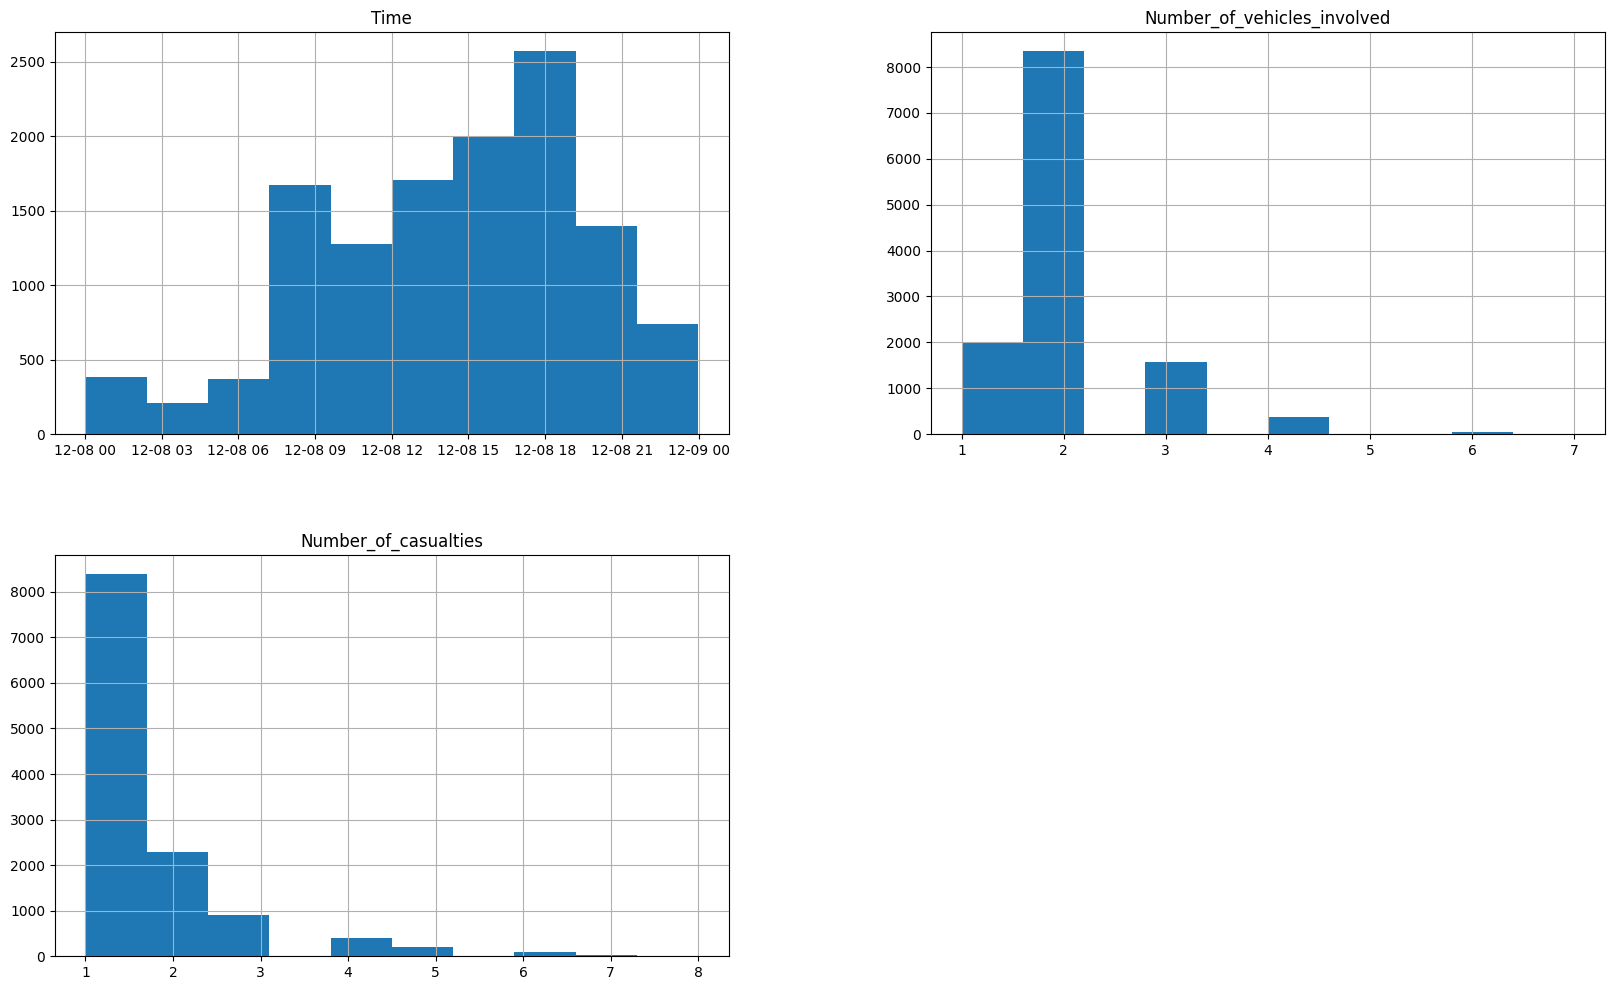

In [15]:
# Visualization to understand trends or evaluate models
df.hist(figsize=(20,12))
plt.show()


In [16]:
df['Number_of_casualties'].value_counts()

Number_of_casualties
1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: count, dtype: int64

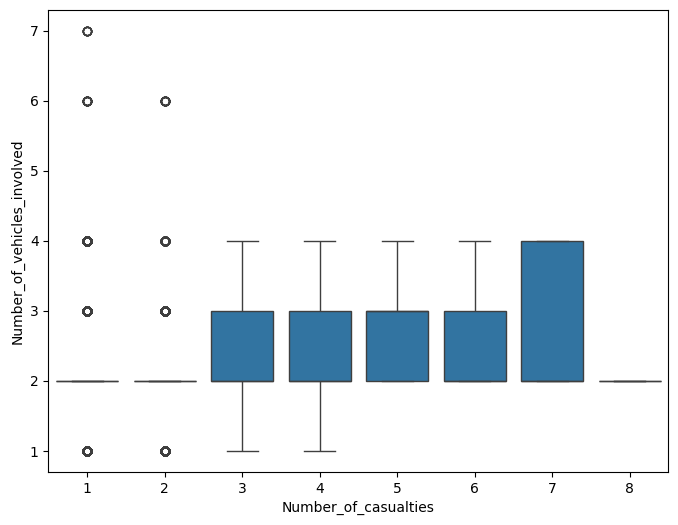

In [17]:
# Visualization to understand trends or evaluate models
plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='Number_of_vehicles_involved', x='Number_of_casualties')
plt.show()

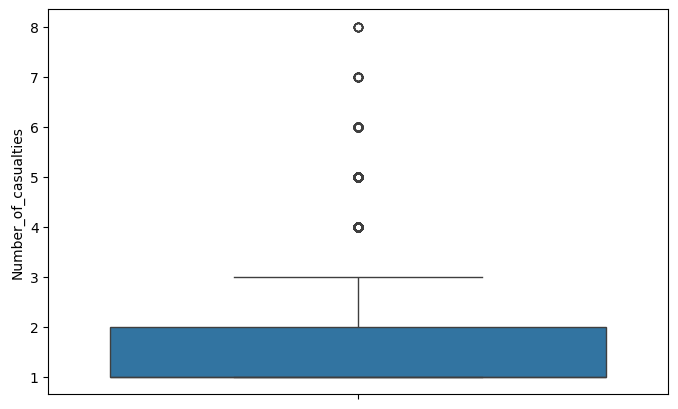

In [18]:
# Visualization to understand trends or evaluate models
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y='Number_of_casualties')
plt.show()

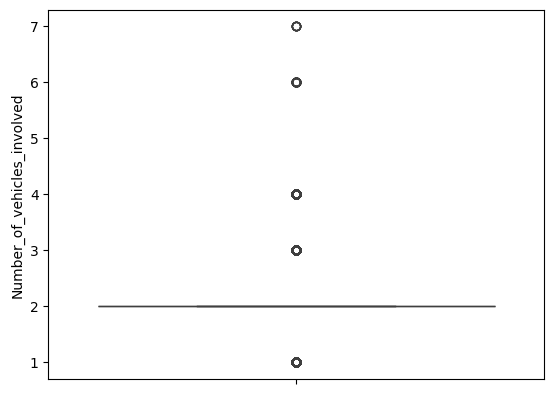

In [19]:
# Visualization to understand trends or evaluate models
sns.boxplot(data=df, y='Number_of_vehicles_involved')
plt.show()

In [20]:
df['Number_of_vehicles_involved']

0        2
1        2
2        2
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: Number_of_vehicles_involved, Length: 12316, dtype: int64

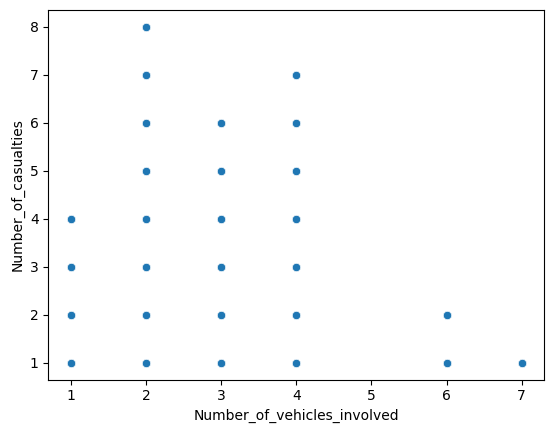

In [21]:
# Visualization to understand trends or evaluate models
sns.scatterplot(x=df['Number_of_vehicles_involved'], y=df['Number_of_casualties'])
plt.show()

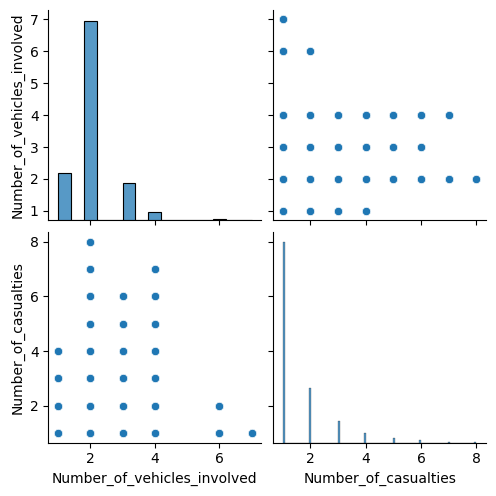

In [22]:
# Visualization to understand trends or evaluate models
sns.pairplot(df[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

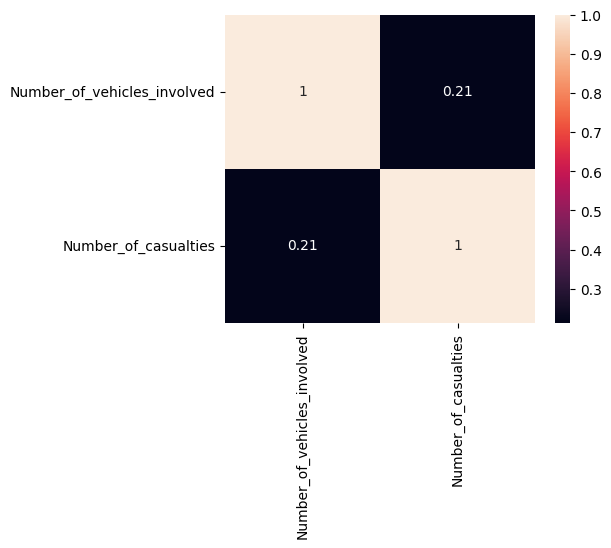

In [23]:
# Visualization to understand trends or evaluate models
plt.figure(figsize=(5,4))
correlation_matrix = df[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#### Categorical Data Analysis

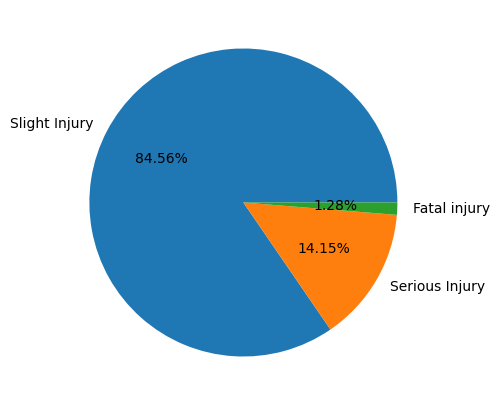

In [24]:
# Visualization to understand trends or evaluate models
plt.figure(figsize=(5,5))
plt.pie(x=df['Accident_severity'].value_counts().values,
        labels=df['Accident_severity'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

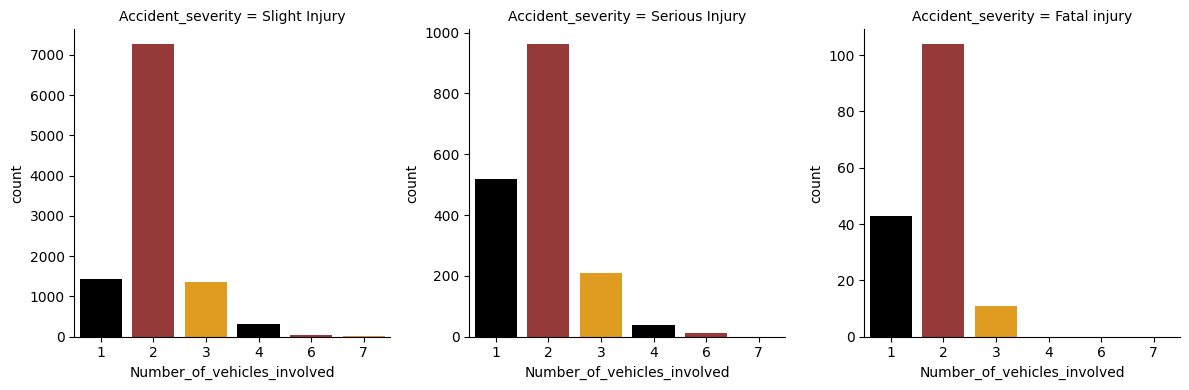

In [25]:
# Visualization to understand trends or evaluate models
# creating a facet grid with columns as survived=0 and survived=1
grid = sns.FacetGrid(data=df, col='Accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

In [26]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [27]:
# dropping columns that can cause imbalance while imputation
lists=['Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality','Day_of_week','Casualty_severity','Time','Sex_of_driver','Educational_level','Defect_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle', 'Road_surface_type','Sex_of_casualty']
df.drop(columns = lists, inplace=True)

In [28]:
df.shape

(12316, 19)

In [29]:
df.columns

Index(['Age_band_of_driver', 'Driving_experience', 'Type_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [30]:
# fill missing values with mean column values
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0], inplace=True)
df['Age_band_of_driver'].fillna(df['Age_band_of_driver'].mode()[0], inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0], inplace=True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace=True)
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0], inplace=True)
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0], inplace=True)
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0], inplace=True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0], inplace=True)

In [31]:
df.isnull().sum()

Age_band_of_driver             0
Driving_experience             0
Type_of_vehicle                0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Age_band_of_casualty           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

Class 0: 10415
Class 1: 1743
Proportion: 5.98 : 1


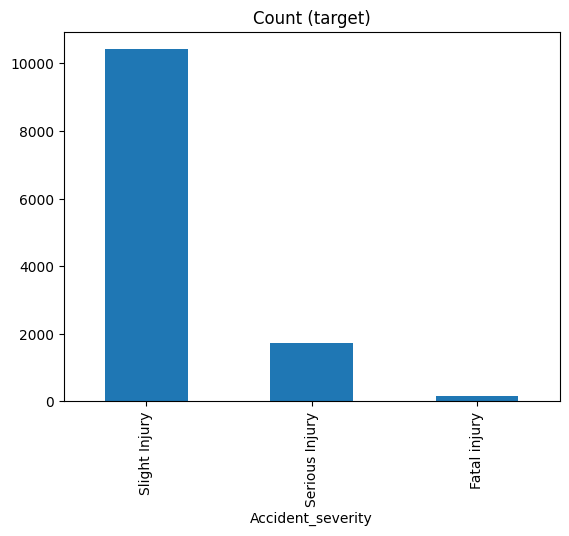

In [32]:
target_count = df['Accident_severity'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

### Feature Engineering
#### Encoding

In [33]:
# Import required libraries
from sklearn.preprocessing import LabelEncoder           #or one hot encoder
LE = LabelEncoder()
df=df.apply(LE.fit_transform)                            #categorical values to integers
# Note: Ensure all necessary libraries are installed

<Axes: >

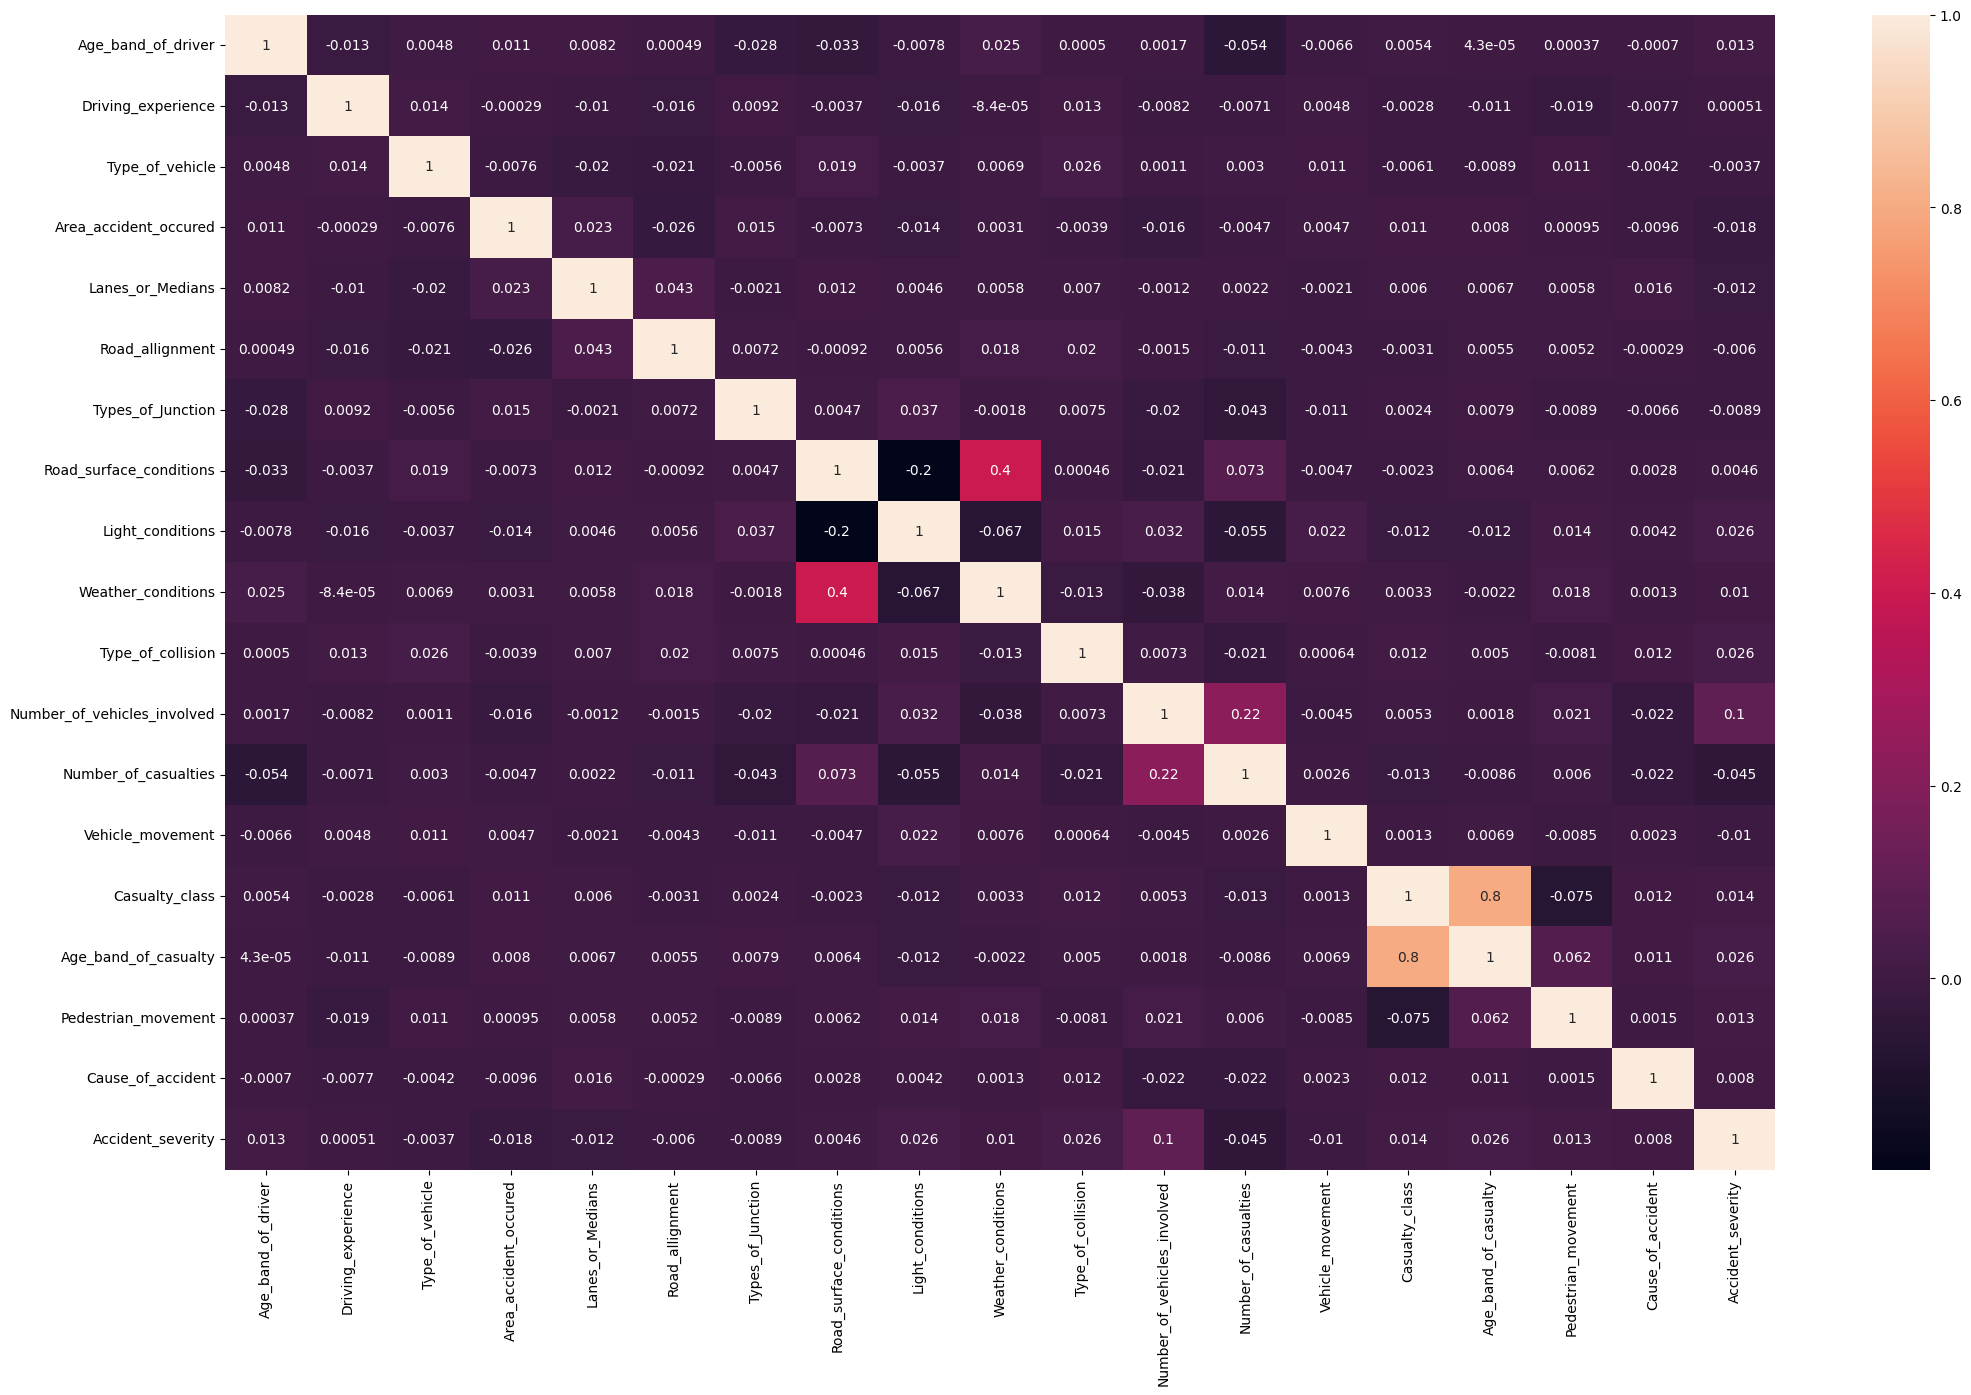

In [34]:
# Visualization to understand trends or evaluate models
plt.figure(figsize=[25,15])
sns.heatmap(df.corr(),annot=True)

In [35]:
# Visualization to understand trends or evaluate models
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 22:
        sns.countplot(y=col, data=df)
        plt.show()

#### Upsampling

In [36]:
# Import required libraries
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
#from unbalanced_dataset import UnderSampler, OverSampler, SMOTE

x = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)
# Note: Ensure all necessary libraries are installed

(8621, 18) (3695, 18) (8621,) (3695,)


In [37]:
# upsampling using smote

counter = Counter(ytrain)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
xtrain, ytrain = oversample.fit_resample(xtrain, ytrain)

counter = Counter(ytrain)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", xtrain.shape, ytrain.shape)

Class= 2, n=7324 (84.96%)
Class= 1, n=1191 (13.82%)
Class= 0, n=106 (1.23%)
Class= 2, n=7324 (33.33%)
Class= 1, n=7324 (33.33%)
Class= 0, n=7324 (33.33%)
Upsampled data shape:  (21972, 18) (21972,)


#### Splitting test and train data

In [38]:
x=df.drop(columns=["Accident_severity"])
y=df["Accident_severity"]

In [39]:
# Import required libraries
# Core Libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation

# Machine Learning Models
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  # Ensemble Models

# Data Preprocessing
from sklearn.model_selection import train_test_split  # Splitting dataset
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Scaling and encoding

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report  # Metrics

# Visualization (Optional but Recommended)
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations


# Note: Ensure all necessary libraries are installed

In [40]:
models={"LogisticRegression":LogisticRegression(),
        "DecisionTreeClassifier":DecisionTreeClassifier(),
        "SVM":SVC(),
        "KNeighborsClassifier":KNeighborsClassifier(),
        "GNB":GaussianNB(),
       "RandomForestClassifier":RandomForestClassifier(),
        "AdaBoostClassifier":AdaBoostClassifier(),
        "GradientBoostingClassifier":GradientBoostingClassifier(),
        }

In [41]:
# models,x,y,scaleFlag=0,1,2
def modelAccuracy(models,x,y,scaleFlag):
    #train/Test
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
    acc_result={}
    for name,model in models.items():
        #pipeline
        #1.Transformer -> 2.Model
        if(scaleFlag==1):
            model_pipeline=Pipeline([('MinMaxScler',MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
             model_pipeline=Pipeline([('StandardScaler',StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #training/testing on model pipeline
        model_fit=model_pipeline.fit(xtrain,ytrain)
        ypred=model_fit.predict(xtest)
        acc=accuracy_score(ytest,ypred)
        print("The Accuracy for ",name," is :",acc)
        acc_result[name]=acc
    return acc_result

In [42]:
def bestModel(result):
    high=0
    for name,acc in result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name," with accuaracy =>",high)

In [43]:
# Training the model with specified parameters
def bestParams(model,param,xtrain,ytrain):
    #cv
    cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3)
    grid_cv=GridSearchCV(estimator=model,param_grid=param,cv=cv,scoring="f1_weighted")
    res=grid_cv.fit(xtrain,ytrain)
    print("Best Parameters are ",res.best_params_)
    print("Best Accuracy is ",res.best_score_)

In [44]:
bestParams

<function __main__.bestParams(model, param, xtrain, ytrain)>

In [45]:
acc=modelAccuracy(models,x,y,1)

The Accuracy for  LogisticRegression  is : 0.84375
The Accuracy for  DecisionTreeClassifier  is : 0.7329545454545454
The Accuracy for  SVM  is : 0.84375
The Accuracy for  KNeighborsClassifier  is : 0.8262987012987013
The Accuracy for  GNB  is : 0.8145292207792207
The Accuracy for  RandomForestClassifier  is : 0.8457792207792207
The Accuracy for  AdaBoostClassifier  is : 0.8425324675324676
The Accuracy for  GradientBoostingClassifier  is : 0.8482142857142857


In [46]:
bestModel(acc)

Best Model is  GradientBoostingClassifier  with accuaracy => 0.8482142857142857


In [47]:
#Final Evaluation
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

NameError: name 'ypred' is not defined